### Linear regression 

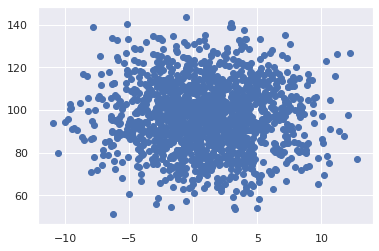

In [6]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



housePrice = np.random.normal(1.0, 4.0, 1500)
purchaseAmount = 100 - (housePrice + np.random.normal(0, 0.1, 1500)) * 4
plt.scatter(houseprice, purchaseAmount);


In [7]:
from scipy import stats

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(housePrice, purchaseAmount)

In [9]:
r_value**2

0.999384965682642

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

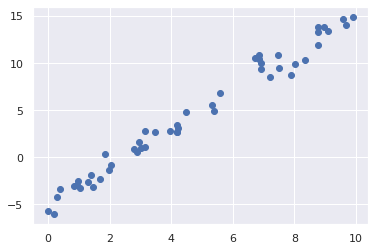

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

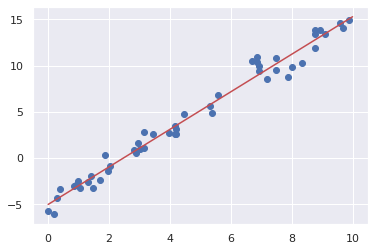

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


### Basic Function Regression
**Ploynomial Function**

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [15]:
# polynomial regression 
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

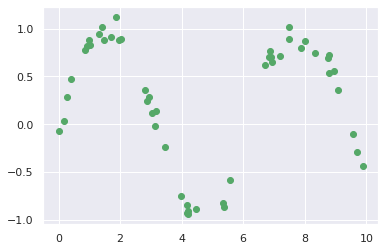

In [19]:
plt.scatter(x,y, color='g');

In [55]:
x.shape, y.shape

((50,), (50,))

In [61]:
poly = make_pipeline(PolynomialFeatures(7), 
                          LinearRegression())

x_test = np.linspace(0,10,1000)


poly.fit(x[:, np.newaxis], y.reshape(-1,1))
y_pred = poly.predict(x_test[:, np.newaxis])


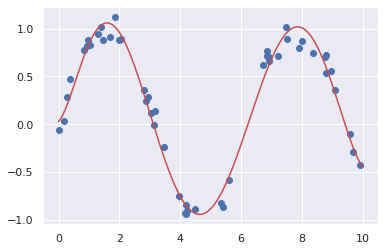

In [62]:
plt.scatter(x, y)
plt.plot(x_test, y_pred, color='r');

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussFeature(BaseEstimator, TransformerMixin):
    """ 
    Help Doc
    Uniformly spaced Gaussian featues for one dimensional input 
    
    """
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    


In [68]:
gauss = make_pipeline(GaussFeature(20), 
                               LinearRegression())
gauss.fit(x[:, np.newaxis], y)
y_pred = gauss.predict(x_test[:, np.newaxis])

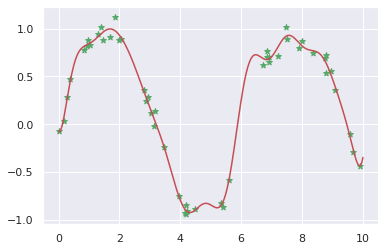

In [86]:
plt.scatter(x, y, marker='*', c='g')
plt.plot(x_test, y_pred, color='r');

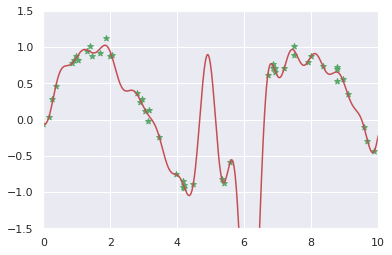

In [121]:
gauss3 = make_pipeline(GaussFeature(30), 
                               LinearRegression())
gauss3.fit(x[:, np.newaxis], y)
y_pred = gauss3.predict(x_test[:, np.newaxis])

plt.scatter(x, y, marker='*', c='g')
plt.plot(x_test, y_pred, color='r');
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

### L2 Regularization 

In [108]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussFeature(30), Ridge(alpha=0.1))

In [113]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x,y, color ='g', marker = '*')
    ax[0].plot(x_test, model.predict(x_test[:,np.newaxis]), color='r')
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel = 'basis location', ylabel = 'coefficient', xlim = (0,10))

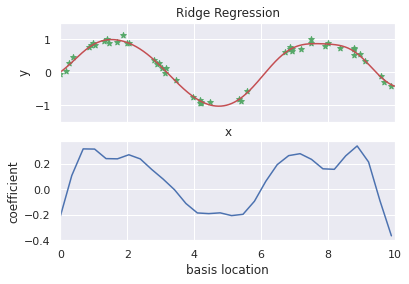

In [119]:
basis_plot(model, title='Ridge Regression')

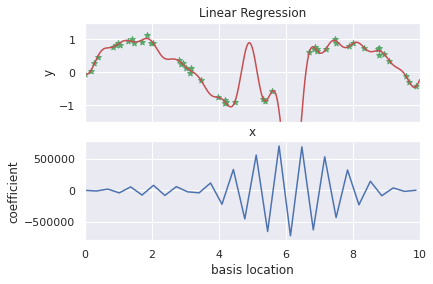

In [122]:
basis_plot(gauss3, "Linear Regression")

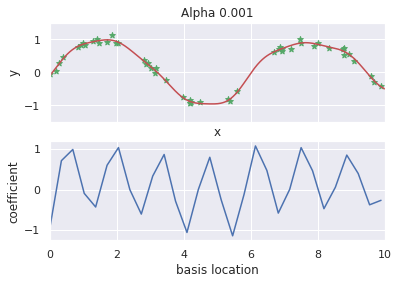

In [125]:
model2 = make_pipeline(GaussFeature(30), Ridge(alpha=0.001))
basis_plot(model2, "Alpha 0.001")